In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [53]:
def detectar_outliers_iqr(df, columna, factor=1.5):
    """
    Detecta outliers usando el método IQR.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame de pandas
    columna : str
        Nombre de la columna numérica
    factor : float, default=1.5
        Factor multiplicador del IQR (1.5 estándar, 3.0 más conservador)
    
    Retorna:
    --------
    dict : Diccionario con información de outliers
    """
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular límites
    limite_inferior = Q1 - factor * IQR
    limite_superior = Q3 + factor * IQR
    
    # Identificar outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': len(outliers),
        'outliers': outliers,
        'indices_outliers': outliers.index.tolist()
    }

print("✅ Función detectar_outliers_iqr creada")

✅ Función detectar_outliers_iqr creada


In [4]:
df = pd.read_csv("./cs-construction.csv", index_col="Unnamed: 0")
df.sample(10)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
20550                  0                              0.136569   51   
18454                  0                              0.024926   55   
119629                 0                              0.133529   49   
31557                  1                              0.962179   33   
88612                  0                              0.228149   46   
129536                 1                              0.521479   26   
145773                 0                              0.109760   56   
19948                  0                              0.234826   34   
65910                  0                              0.001009   79   
126964                 1                              0.020815   65   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
20550                                      0     0.507415         6000.0   
18454                                      0     0.461691         9083.0   
119629                                     0     0.345555        12000.0   
31557                                      1     0.879791         4200.0   
88612                                      0     0.539906         3833.0   
129536                                     1     0.005862         2558.0   
145773                                     0     0.050332        11900.0   
19948                                      0     0.422955         5340.0   
65910                                      0     2.000000            NaN   
126964                                     1  2812.000000            NaN   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
20550                                19                        0   
18454                                12                        0   
119629                                5                        0   
31557                                14                        0   
88612                                11                        0   
129536                                1                        0   
145773                                9                        0   
19948                                 5                        0   
65910                                 5                        0   
126964                                7                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
20550                              1                                     1   
18454                              3                                     0   
119629                             2                                     0   
31557                              2                                     0   
88612                              1                                     0   
129536                             0                                     1   
145773                             0                                     0   
19948                              1                                     0   
65910                              0                                     0   
126964                             2                                     0   

        NumberOfDependents  
20550                  2.0  
18454                  0.0  
119629                 2.0  
31557                  0.0  
88612                  0.0  
129536                 1.0  
145773                 0.0  
19948                  0.0  
65910                  NaN  
126964                 NaN

In [5]:
# Cargar diccionario
pd.options.display.max_colwidth = None 
dicc = pd.read_excel("./cs-Data Dictionary.xls", skiprows=1)
dicc

Variable Name  \
0                       SeriousDlqin2yrs   
1   RevolvingUtilizationOfUnsecuredLines   
2                                    age   
3   NumberOfTime30-59DaysPastDueNotWorse   
4                              DebtRatio   
5                          MonthlyIncome   
6        NumberOfOpenCreditLinesAndLoans   
7                NumberOfTimes90DaysLate   
8           NumberRealEstateLoansOrLines   
9   NumberOfTime60-89DaysPastDueNotWorse   
10                    NumberOfDependents   

                                                                                                                                                 Description  \
0                                                                                                  Person experienced 90 days past due delinquency or worse    
1   Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits   
2                                                                                                                                   Age of borrower in years   
3                                                                    Number of times borrower has been 30-59 days past due but no worse in the last 2 years.   
4                                                                                 Monthly debt payments, alimony,living costs divided by monthy gross income   
5                                                                                                                                             Monthly income   
6                                                       Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)   
7                                                                                                Number of times borrower has been 90 days or more past due.   
8                                                                             Number of mortgage and real estate loans including home equity lines of credit   
9                                                                    Number of times borrower has been 60-89 days past due but no worse in the last 2 years.   
10                                                                               Number of dependents in family excluding themselves (spouse, children etc.)   

          Type  
0          Y/N  
1   percentage  
2      integer  
3      integer  
4   percentage  
5         real  
6      integer  
7      integer  
8      integer  
9      integer  
10     integer

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [7]:
df.describe().T

count         mean           std  \
SeriousDlqin2yrs                      150000.0     0.066840      0.249746   
RevolvingUtilizationOfUnsecuredLines  150000.0     6.048438    249.755371   
age                                   150000.0    52.295207     14.771866   
NumberOfTime30-59DaysPastDueNotWorse  150000.0     0.421033      4.192781   
DebtRatio                             150000.0   353.005076   2037.818523   
MonthlyIncome                         120269.0  6670.221237  14384.674215   
NumberOfOpenCreditLinesAndLoans       150000.0     8.452760      5.145951   
NumberOfTimes90DaysLate               150000.0     0.265973      4.169304   
NumberRealEstateLoansOrLines          150000.0     1.018240      1.129771   
NumberOfTime60-89DaysPastDueNotWorse  150000.0     0.240387      4.155179   
NumberOfDependents                    146076.0     0.757222      1.115086   

                                      min          25%          50%  \
SeriousDlqin2yrs                      0.0     0.000000     0.000000   
RevolvingUtilizationOfUnsecuredLines  0.0     0.029867     0.154181   
age                                   0.0    41.000000    52.000000   
NumberOfTime30-59DaysPastDueNotWorse  0.0     0.000000     0.000000   
DebtRatio                             0.0     0.175074     0.366508   
MonthlyIncome                         0.0  3400.000000  5400.000000   
NumberOfOpenCreditLinesAndLoans       0.0     5.000000     8.000000   
NumberOfTimes90DaysLate               0.0     0.000000     0.000000   
NumberRealEstateLoansOrLines          0.0     0.000000     1.000000   
NumberOfTime60-89DaysPastDueNotWorse  0.0     0.000000     0.000000   
NumberOfDependents                    0.0     0.000000     0.000000   

                                              75%        max  
SeriousDlqin2yrs                         0.000000        1.0  
RevolvingUtilizationOfUnsecuredLines     0.559046    50708.0  
age                                     63.000000      109.0  
NumberOfTime30-59DaysPastDueNotWorse     0.000000       98.0  
DebtRatio                                0.868254   329664.0  
MonthlyIncome                         8249.000000  3008750.0  
NumberOfOpenCreditLinesAndLoans         11.000000       58.0  
NumberOfTimes90DaysLate                  0.000000       98.0  
NumberRealEstateLoansOrLines             2.000000       54.0  
NumberOfTime60-89DaysPastDueNotWorse     0.000000       98.0  
NumberOfDependents                       1.000000       20.0

In [8]:
print(df.isnull().sum())

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [35]:
# Ver la correlacion entre las distintas variables
corrs = df.corr(numeric_only = True)

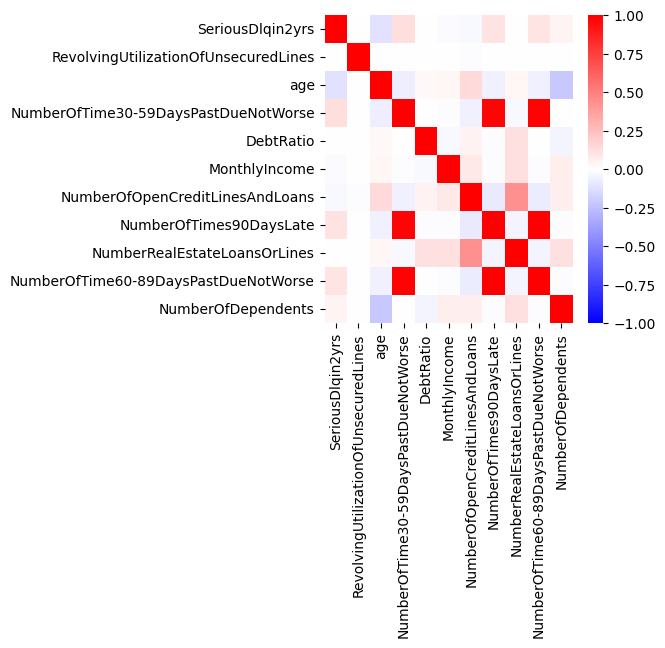

In [36]:
plt.figure(figsize=(4, 4))
sns.heatmap(corrs, cmap="bwr", vmin=-1);

<Figure size 400x400 with 0 Axes>

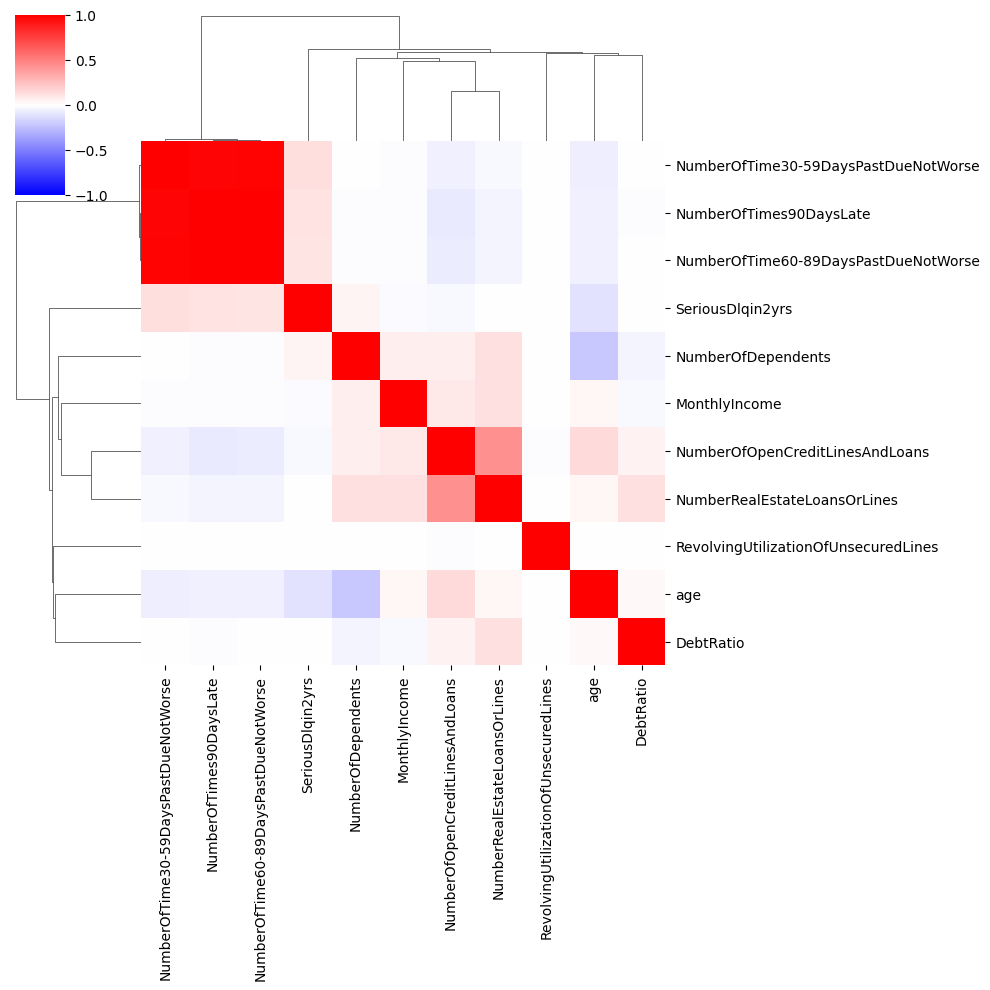

In [37]:
plt.figure(figsize=(4, 4))
sns.clustermap(corrs, cmap="bwr", vmin=-1);

## MonthlyIncome
Hay que limpiar esta variable por que hay varios valores vacios

In [30]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corre = df[numeric_cols].corr()['MonthlyIncome'].sort_values(key=abs, ascending=False)
print("Correlaciones con MonthlyIncome:")
print(corre)

Correlaciones con MonthlyIncome:
MonthlyIncome                           1.000000
NumberRealEstateLoansOrLines            0.124959
NumberOfOpenCreditLinesAndLoans         0.091455
NumberOfDependents                      0.062647
age                                     0.037717
DebtRatio                              -0.028712
SeriousDlqin2yrs                       -0.019746
NumberOfTimes90DaysLate                -0.012743
NumberOfTime60-89DaysPastDueNotWorse   -0.011116
NumberOfTime30-59DaysPastDueNotWorse   -0.010217
RevolvingUtilizationOfUnsecuredLines    0.007124
Name: MonthlyIncome, dtype: float64


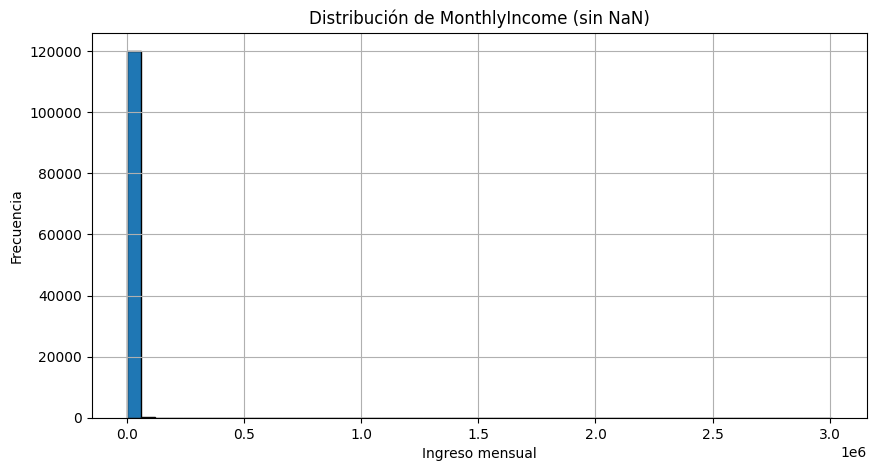

In [33]:
plt.figure(figsize=(10, 5))
df['MonthlyIncome'].dropna().hist(bins=50, edgecolor='k')
plt.title('Distribución de MonthlyIncome (sin NaN)')
plt.xlabel('Ingreso mensual')
plt.ylabel('Frecuencia')
plt.show()

In [40]:
# sacar la mediana puesto que no hay relacion lineal con ninguna otra variable
df_copia = df.copy()
median_income = df_copia['MonthlyIncome'].median()
df_copia['MonthlyIncome'].fillna(median_income, inplace=True)

C:\Users\braya\AppData\Local\Temp\ipykernel_1256\3531070093.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['MonthlyIncome'].fillna(median_income, inplace=True)


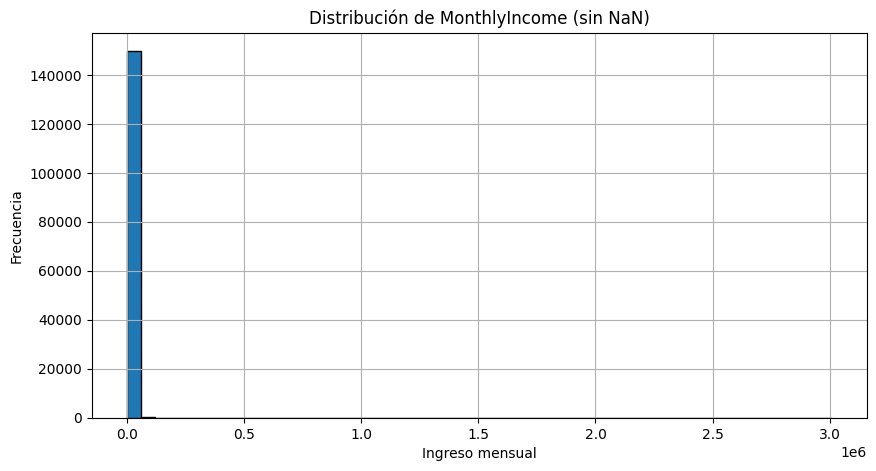

In [41]:
plt.figure(figsize=(10, 5))
df_copia['MonthlyIncome'].dropna().hist(bins=50, edgecolor='k')
plt.title('Distribución de MonthlyIncome (sin NaN)')
plt.xlabel('Ingreso mensual')
plt.ylabel('Frecuencia')
plt.show()

## NumberOfDependents

In [34]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corredep = df[numeric_cols].corr()['NumberOfDependents'].sort_values(key=abs, ascending=False)
print("Correlaciones con NumberOfDependents:")
print(corredep)

Correlaciones con NumberOfDependents:
NumberOfDependents                      1.000000
age                                    -0.213303
NumberRealEstateLoansOrLines            0.124684
NumberOfOpenCreditLinesAndLoans         0.065322
MonthlyIncome                           0.062647
SeriousDlqin2yrs                        0.046048
DebtRatio                              -0.040673
NumberOfTime60-89DaysPastDueNotWorse   -0.010922
NumberOfTimes90DaysLate                -0.010176
NumberOfTime30-59DaysPastDueNotWorse   -0.002680
RevolvingUtilizationOfUnsecuredLines    0.001557
Name: NumberOfDependents, dtype: float64


In [43]:
df["NumberOfDependents"].isna().sum()

np.int64(3924)

In [44]:
# sacar la mediana puesto que no hay relacion lineal con ninguna otra variable
median_dependent = df_copia['NumberOfDependents'].median()
df_copia['NumberOfDependents'].fillna(median_dependent, inplace=True)

C:\Users\braya\AppData\Local\Temp\ipykernel_1256\1525940297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['NumberOfDependents'].fillna(median_dependent, inplace=True)


In [45]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtypes: fl

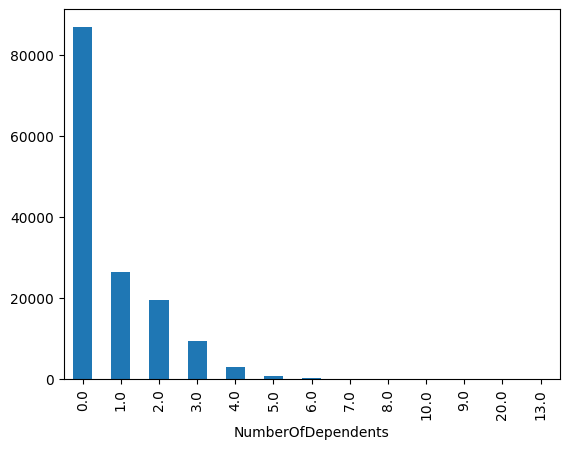

In [56]:
df["NumberOfDependents"].value_counts().plot(kind="bar");

## Detectar outliners

In [57]:
detectar_outliers_iqr(df_copia, "NumberOfDependents")

{'Q1': np.float64(0.0),
 'Q3': np.float64(1.0),
 'IQR': np.float64(1.0),
 'limite_inferior': np.float64(-1.5),
 'limite_superior': np.float64(2.5),
 'n_outliers': 13336,
 'outliers':         SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
 70                     0                              0.269484   64   
 75                     1                              0.133063   49   
 76                     0                              0.234218   36   
 106                    0                              0.114831   46   
 115                    0                              0.180972   39   
 124                    0                              0.444838   58   
 143                    0                              0.243872   53   
 146                    0                              1.000000   38   
 149                    0                              0.546999   50   
 151                    0                              0.000000   48   
 157                    0 

## Creo modelo basico

In [58]:
cols = ["SeriousDlqin2yrs", "RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio", 
        "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines",
        "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]
df_copia = df_copia[cols]

In [59]:
df.head(3)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   
3                                2                        1   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
1                             6                                     0   
2                             0                                     0   
3                             0                                     0   

   NumberOfDependents  
1                 2.0  
2                 1.0  
3                 0.0

In [60]:
df = 1*pd.get_dummies(df_copia, drop_first=True)
df.head(3)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   
3                                2                        1   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
1                             6                                     0   
2                             0                                     0   
3                             0                                     0   

   NumberOfDependents  
1                 2.0  
2                 1.0  
3                 0.0

In [62]:
df.shape, df_copia.shape


((150000, 11), (150000, 11))

In [63]:
df_train, df_test = train_test_split(df_copia, test_size=0.3, random_state=1)
df_train.head(3)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
30181                  0                              0.000000   87   
8290                   1                              1.000000   37   
100856                 0                              0.098249   57   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
30181                                      0     0.000000         5400.0   
8290                                       1  2486.000000            0.0   
100856                                     0     0.328728         6369.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
30181                                 2                        0   
8290                                  7                        1   
100856                                5                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
30181                              0                                     0   
8290                               1                                     1   
100856                             2                                     0   

        NumberOfDependents  
30181                  0.0  
8290                   4.0  
100856                 0.0

In [64]:
df_train.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
30181                  0                              0.000000   87   
8290                   1                              1.000000   37   
100856                 0                              0.098249   57   
53981                  0                              0.931126   54   
115894                 0                              0.098613   49   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
30181                                      0     0.000000         5400.0   
8290                                       1  2486.000000            0.0   
100856                                     0     0.328728         6369.0   
53981                                      0     0.662097         3500.0   
115894                                     0     0.328836         2000.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
30181                                 2                        0   
8290                                  7                        1   
100856                                5                        0   
53981                                 7                        0   
115894                                5                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
30181                              0                                     0   
8290                               1                                     1   
100856                             2                                     0   
53981                              2                                     0   
115894                             0                                     0   

        NumberOfDependents  
30181                  0.0  
8290                   4.0  
100856                 0.0  
53981                  0.0  
115894                 0.0

In [65]:
# Apuntes
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

# Examen
X_test = df_test.drop("SalePrice", axis=1)
y_test = df_test["SalePrice"]

KeyError: "['SalePrice'] not found in axis"

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) # Entrenamiendo del modelo

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
predicciones_train = np.exp(model.predict(X_train)).round()
predicciones_test = np.exp(model.predict(X_test)).round()
predicciones_train[:10]

In [ ]:
reales_train = np.exp(y_train.values)
reales_test = np.exp(y_test.values)
reales_test[:10]

In [ ]:
maximo = max(max(predicciones_train), max(predicciones_test), max(reales_train), max(reales_test))
maximo

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1) # filas, columnas, subfigura a pintar
plt.plot(reales_train, predicciones_train, ".b", alpha=0.2)
plt.xlabel("Precios reales en train")
plt.ylabel("Predicciones en train")
plt.plot([0, maximo], [0,maximo], "r")
plt.xlim([0, maximo])
plt.ylim([0, maximo])

plt.subplot(1, 3, 3) # filas, columnas, subfigura a pintar
plt.plot(reales_test, predicciones_test, ".g", alpha=0.2)
plt.xlabel("Precios reales en test")
plt.ylabel("Predicciones en test")
plt.plot([0, maximo], [0,maximo], "r")
plt.xlim([0, maximo])
plt.ylim([0, maximo])